In [41]:
import os
from decouple import AutoConfig # Install python-decouple
import requests # Install requests
import pandas as pd
import plotly as plt

In [9]:
config = AutoConfig(".env") # Create a file called .env file in the same directory.
                            # This is just a text file that contains the BEARER TOKEN so that we don't 
                            # Have to include it in the code.
                            # It will have one line like the following (exclude the angle brackets):
                            # BEARER_TOKEN=<MY_BEARER_TOKEN>

In [10]:
BASE = "https://api-ibis.rilm.org/200/haverford/"

URLS = {
    "year": BASE + "rilm_index_RYs",
    "terms": BASE + "rilm_index_top_terms",
    "index": BASE + "rilm_index",
}

In [11]:
HEADERS = {
    "Authorization": f"Bearer {config('BEARER_TOKEN')}"
}

# Example queries

https://api-ibis.rilm.org/200/haverford/rilm_index_RYs?termName=activism

https://api-ibis.rilm.org/200/haverford/rilm_index_top_terms?termName=activism

https://api-ibis.rilm.org/200/haverford/rilm_index?termName=activism

Possible terms of interest:

- women’s studies
- Jewish studies
- therapy
- psychology
- activism
- ecology
- sustainability

In [23]:
params = {
    "termName": "ecology"
}

In [24]:
response = requests.get(
    URLS["index"], 
    headers=HEADERS, 
    params=params
)
response.url

'https://api-ibis.rilm.org/200/haverford/rilm_index?termName=ecology'

In [25]:
data = response.json()

In [26]:
data

[{'ry': 1963,
  'ac': 10634,
  'ent': 1,
  'lvl': 1,
  'id': 293815,
  'name': 'ecology',
  'cat': 'T'},
 {'ry': 1963,
  'ac': 10634,
  'ent': 1,
  'lvl': 2,
  'id': 1217528,
  'name': 'cultural ecology',
  'cat': 'Z'},
 {'ry': 1963,
  'ac': 10634,
  'ent': 1,
  'lvl': 3,
  'id': 1894046,
  'name': 'ecology of music',
  'cat': None},
 {'ry': 1963,
  'ac': 10634,
  'ent': 2,
  'lvl': 1,
  'id': 81078,
  'name': 'audiences',
  'cat': 'T'},
 {'ry': 1963,
  'ac': 10634,
  'ent': 2,
  'lvl': 2,
  'id': 293815,
  'name': 'ecology',
  'cat': 'T'},
 {'ry': 1973,
  'ac': 24842,
  'ent': 1,
  'lvl': 1,
  'id': 293815,
  'name': 'ecology',
  'cat': 'T'},
 {'ry': 1973,
  'ac': 24842,
  'ent': 1,
  'lvl': 2,
  'id': 18717,
  'name': 'acoustic ecology',
  'cat': 'Z'},
 {'ry': 1973,
  'ac': 24842,
  'ent': 1,
  'lvl': 3,
  'id': 33738,
  'name': 'Schafer, R. Murray',
  'cat': 'N'},
 {'ry': 1975,
  'ac': 3114,
  'ent': 1,
  'lvl': 1,
  'id': 293815,
  'name': 'ecology',
  'cat': 'T'},
 {'ry': 1975,
  

In [27]:
df = pd.DataFrame(data)
df.head(20)

,ry,ac,ent,lvl,id,name,cat
0,1963,10634,1,1,293815,ecology,T
1,1963,10634,1,2,1217528,cultural ecology,Z
2,1963,10634,1,3,1894046,ecology of music,None
3,1963,10634,2,1,81078,audiences,T
4,1963,10634,2,2,293815,ecology,T
5,1973,24842,1,1,293815,ecology,T
6,1973,24842,1,2,18717,acoustic ecology,Z
7,1973,24842,1,3,33738,"Schafer, R. Murray",N
8,1975,3114,1,1,293815,ecology,T
9,1975,3114,1,2,18717,acoustic ecology,Z


In [28]:
df.groupby('ac').name.unique().to_csv("sample-RILM-index.csv")


In [29]:
df['full_acc'] = df.ry.apply(str) + "-"  + df.ac.apply(str)


In [30]:
df.full_acc.nunique()

744

In [31]:
df.ac.nunique()

741

In [48]:
schafer = df[df.name.str.contains("Schafer")]

array([[<AxesSubplot:title={'center':'ry'}>]], dtype=object)

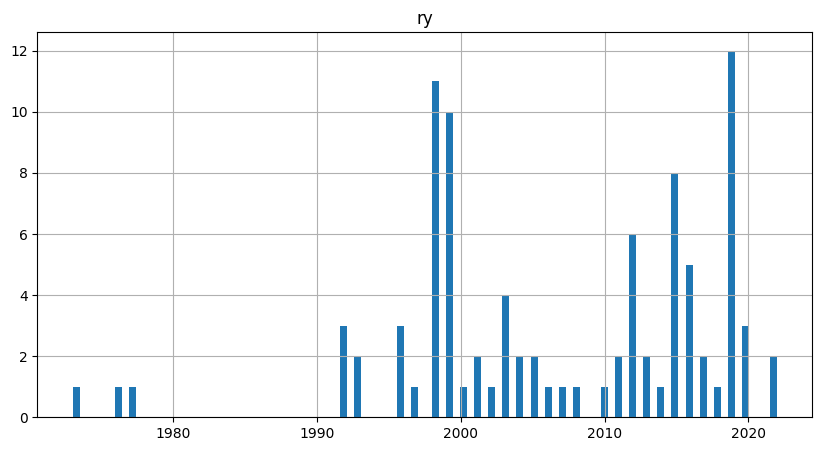

In [49]:
schafer.hist('ry', figsize=(10, 5), bins=100)
